In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import re
from collections import Counter
import stanza
from spellchecker import SpellChecker
from nltk.corpus import words
import zemberek
from zemberek.morphology import TurkishMorphology
from zemberek.tokenization import TurkishTokenizer
from zemberek.normalization import TurkishSpellChecker
from zemberek.normalization import  TurkishSentenceNormalizer
import jpype
import jpype.imports
from jpype.types import JString

# READ DATA

In [14]:
df = pd.read_csv('tweets.csv')
df.head()

,timestamp,username,handle,tweet_date,content
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @OguzhanUgur\n hepinizden Alla...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",Allahım nolur sen onlara dayanma gücü ver #deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",Replying to \n@haluklevent\n @danlabilic\n and...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",Tuğba södekoğlu kovulsun \n@showtv\n #deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",ARKADAŞIMIZA ULAŞAMIYORUZ\nKahramanmaraş Elbis...


# CHECK DATA

In [15]:
def checkData(data):
    print("****************SHAPE****************")
    print(data.shape)
    print("****************COLUMNS****************")
    print(data.columns)
    print("****************DTYPES****************")
    print(data.dtypes)    
    print("****************HEAD****************")
    print(data.head())
    print("****************Tail****************")
    print(data.tail())
    print("****************NA****************")
    print(data.isnull().sum())
    print("****************INFO****************")
    print(data.info())

checkData(df)

****************SHAPE****************
(2676, 5)
****************COLUMNS****************
Index(['timestamp', 'username', 'handle', 'tweet_date', 'content'], dtype='object')
****************DTYPES****************
timestamp     object
username      object
handle        object
tweet_date    object
content       object
dtype: object
****************HEAD****************
             timestamp     username       handle   tweet_date  \
0  2024-11-03 19:38:25  Orhan Şevik  orhan_sevik  Feb 8, 2023   
1  2024-11-03 19:38:25      nursena     nurssxx_  Feb 8, 2023   
2  2024-11-03 19:38:25   Elif ŞEKER  55ellllllif  Feb 8, 2023   
3  2024-11-03 19:38:25        Yusuf  yusufaltuns  Feb 8, 2023   
4  2024-11-03 19:38:25  𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧     dryghtn2  Feb 8, 2023   

                                             content  
0  @haluklevent\n @OguzhanUgur\n  hepinizden Alla...  
1  Allahım nolur sen onlara dayanma gücü ver #deprem  
2  Replying to \n@haluklevent\n @danlabilic\n and...  
3       Tuğba södekoğl

# Tweets Lower And Conver Str

In [16]:
df['content'] = df['content'].astype(str)
df['content'] = df['content'].str.lower()

# Count By Tweet Date

In [17]:
tweet_counts = df.groupby('tweet_date')['content'].count().sort_values(ascending=False)
print("=== Tweet Counts by Date ===")
print(tweet_counts)

=== Tweet Counts by Date ===
tweet_date
Feb 10, 2023    1129
Feb 7, 2023      563
Feb 8, 2023      477
Feb 9, 2023      455
Feb 6, 2023       50
Name: content, dtype: int64


# Hastags

In [18]:
hashtag_counts = df['content'].str.findall(r'#\w+').explode().value_counts()
print("=== Hashtag Counts ===")
print(hashtag_counts)

=== Hashtag Counts ===
content
#deprem                  2686
#hatay                    402
#depremsondakika          193
#hatayyardimbekliyor      193
#afad                     145
                         ... 
#şeytan                     1
#abdgemisiistemiyoruz       1
#arkadaslar                 1
#liberal                    1
#coğrafyadersi              1
Name: count, Length: 767, dtype: int64


# Word Cloud

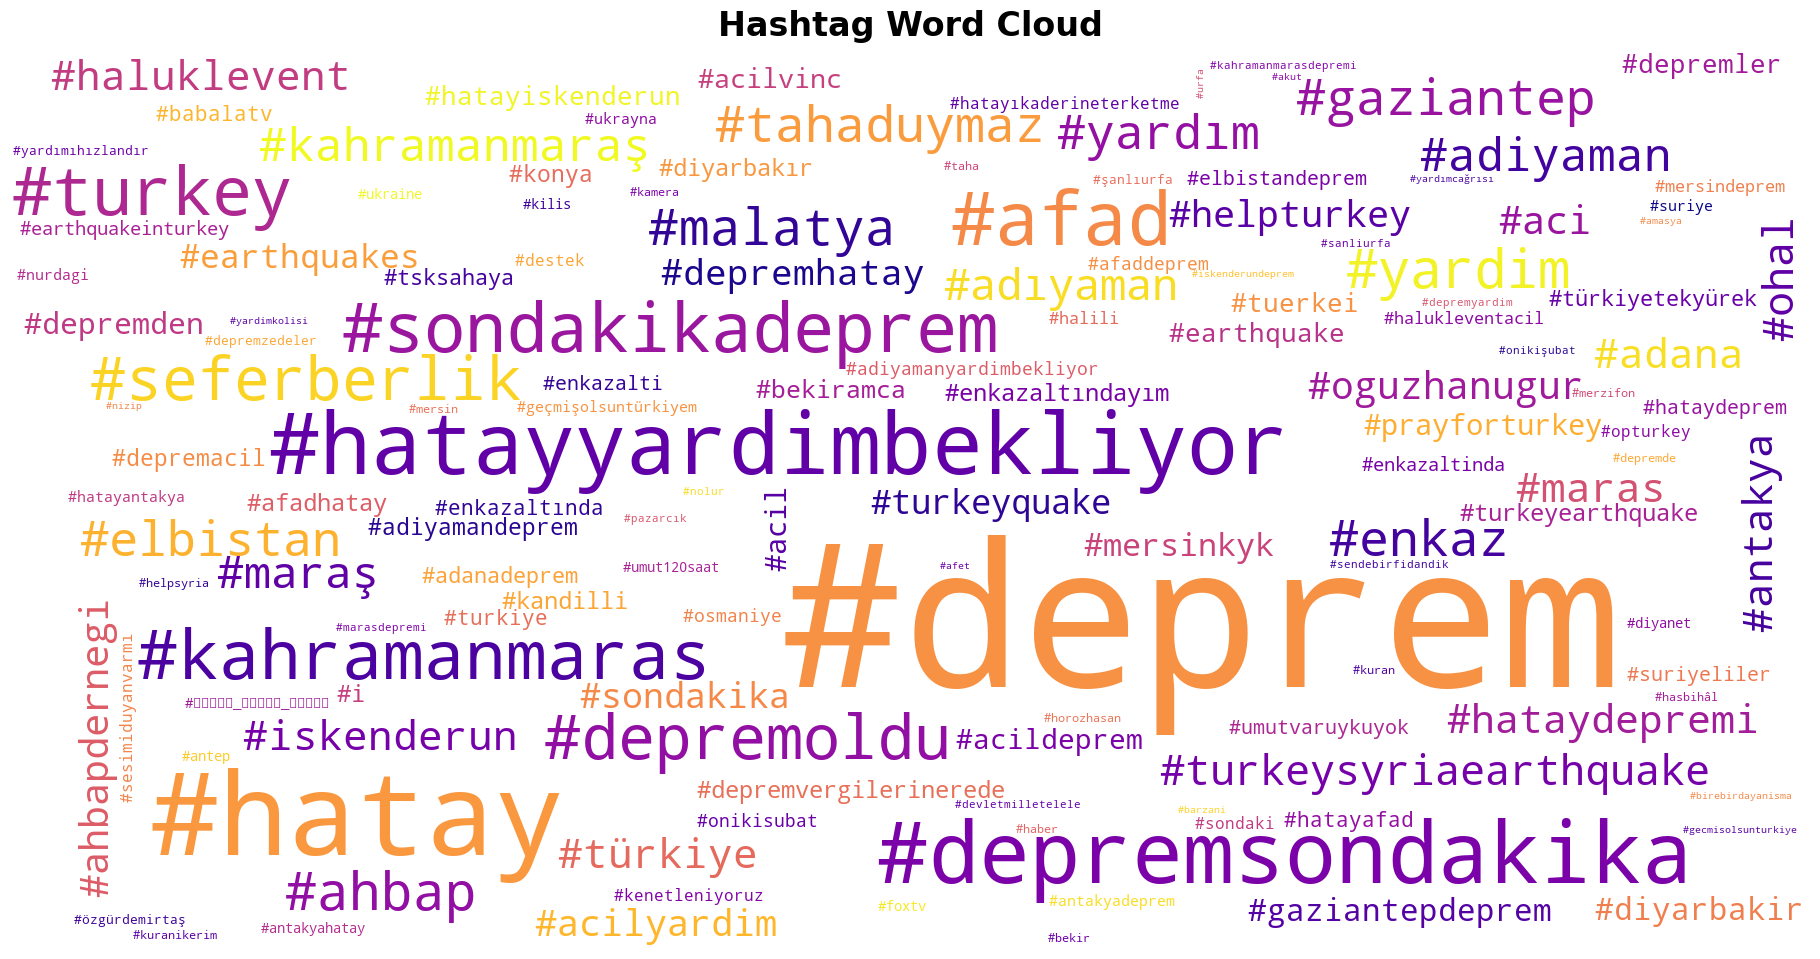

In [19]:
hashtag_dict = hashtag_counts.to_dict()
wordcloud = WordCloud(
    width=1800,
    height=900,
    background_color='white',       
    min_font_size=10,
    max_font_size=200,
    colormap='plasma',              
    contour_color='steelblue',       
    contour_width=1.5               
).generate_from_frequencies(hashtag_dict)
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=24, fontweight='bold', pad=10)
plt.tight_layout(pad=0)
plt.show()

# Remove @ mentions and hyperlinks

In [21]:
def remove_mentions(text):
    return re.sub(r'@[A-Za-z0-9]+', '', text)

def remove_urls(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'www\S+', '', text)   
    return text

df['content_ment_link'] = df['content'].apply(lambda x: remove_mentions(x))
df['content_ment_link'] = df['content_ment_link'].apply(lambda x: remove_urls(x))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...


## Removal of Punctuations

In [23]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['content_wo_punct'] = df['content_ment_link'].apply(lambda x: remove_punctuation(x))
df['content_wo_punct'] = df['content_wo_punct'].str.replace('\n', ' ', regex=False)
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...


## Remove Emojies & Numbers

In [24]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
remove_emoji("game is on 🔥🔥")

'game is on '

In [25]:
def remove_numbers(text):
    return re.sub(r'[0-9]+', '', text)

df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_emoji(x))
df['content_wo_punct'] = df['content_wo_punct'].apply(lambda x: remove_numbers(x))
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...


# Remove English Words

In [27]:
nltk.download("words")
english_words = set(words.words())
english_words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Enes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'raffinase',
 'Sitophilus',
 'balausta',
 'flagrantly',
 'unspinsterlikeness',
 'Oomycetes',
 'Megalornis',
 'demobilization',
 'Nahum',
 'inexpressible',
 'soldierlike',
 'veretilliform',
 'halcyonic',
 'kaleidoscopic',
 'Chontalan',
 'dunair',
 'Tyrrheni',
 'subrational',
 'fluavil',
 'endlessly',
 'ephorship',
 'mythoclastic',
 'cholagogue',
 'melodrame',
 'maldistribution',
 'diallelon',
 'Numenius',
 'lurement',
 'atramental',
 'distater',
 'noncontact',
 'selenography',
 'nonponderosity',
 'pattened',
 'Protonemertini',
 'hypofunction',
 'Phigalian',
 'unbaste',
 'hurr',
 'newsletter',
 'daystar',
 'untrain',
 'gem',
 'midwestward',
 'hypodermis',
 'unidiomatic',
 'unprince',
 'stableman',
 'Percomorphi',
 'guz',
 'stickless',
 'coruscate',
 'asterial',
 'coinsure',
 'supragovernmental',
 'semidelight',
 'Tagula',
 'unbasedness',
 'blackbird',
 'numismatical',
 'overirrigation',
 'pubian',
 'Chanca',
 'hew',
 'peasecod',
 'shaku',
 'theopathetic',
 'polypi',
 'Ferdiad',
 'triodo

In [28]:
def remove_english_words(text):
    return " ".join([word for word in text.split() if word.lower() not in english_words])

df["content_wo_removed_english"] = df["content_wo_punct"].apply(lambda text: remove_english_words(text))
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\breplying\b", "", case=False, regex=True)
df["content_wo_removed_english"] = df["content_wo_removed_english"].str.replace(r"\bshow more\b", "", case=False, regex=True)
df.head()

,timestamp,username,handle,tweet_date,content,content_ment_link,content_wo_punct,content_wo_removed_english
0,2024-11-03 19:38:25,Orhan Şevik,orhan_sevik,"Feb 8, 2023",@haluklevent\n @oguzhanugur\n hepinizden alla...,\n \n hepinizden allah razı olsun iyiki varsı...,hepinizden allah razı olsun iyiki varsını...,hepinizden allah razı olsun iyiki varsınız deprem
1,2024-11-03 19:38:25,nursena,nurssxx_,"Feb 8, 2023",allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver #deprem,allahım nolur sen onlara dayanma gücü ver deprem,allahım nolur onlara dayanma gücü ver deprem
2,2024-11-03 19:38:25,Elif ŞEKER,55ellllllif,"Feb 8, 2023",replying to \n@haluklevent\n @danlabilic\n and...,replying to \n\n \n and \n_harun\nadıyamanda a...,replying to and harun adıyamanda ali taş...,harun adıyamanda ali taşı mahallesi sokak hic...
3,2024-11-03 19:38:25,Yusuf,yusufaltuns,"Feb 8, 2023",tuğba södekoğlu kovulsun \n@showtv\n #deprem,tuğba södekoğlu kovulsun \n\n #deprem,tuğba södekoğlu kovulsun deprem,tuğba södekoğlu kovulsun deprem
4,2024-11-03 19:38:25,𝐎̈𝐳𝐠𝐮̈𝐫 𝐑𝐚𝐧,dryghtn2,"Feb 8, 2023",arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz\nkahramanmaraş elbis...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...,arkadaşimiza ulaşamiyoruz kahramanmaraş elbist...


In [29]:
df.to_csv('cleaned_tweets.csv', index=False)